In [1]:
import cv2
from matplotlib import pyplot
import numpy as np
from scipy.fftpack import dct
from scipy.fftpack import idct
import struct
import zlib

# Zadanie 1

In [2]:
ppm_width = 16
ppm_height = 16

#
# PPM file header
#
ppm_ascii_header = f'P3\n{ppm_width} {ppm_height}\n255\n'  # TODO: implement
ppm_binary_header = f'P6\n{ppm_width} {ppm_height}\n255\n'  # TODO: implement

#
# Image data
#
ppm_raw = [255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 213, 238, 253, 217, 240, 254, 219, 239, 254, 219, 239, 254, 217, 240, 254, 213, 239, 253, 0, 0, 0, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 239, 254, 216, 239, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216, 239, 255, 216, 239, 255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 215, 240, 254, 0, 0, 0, 156, 199, 215, 156, 199, 215, 156, 199, 215, 156, 199, 215, 0, 0, 0, 213, 239, 253, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 239, 255, 217, 239, 254, 216, 239, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 235, 249, 213, 241, 255, 0, 0, 0, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 240, 254, 219, 238, 254, 216, 238, 254, 216, 239, 255, 216, 239, 255, 216, 239, 255, 216, 239, 255, 214, 240, 254, 213, 241, 255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 240, 254, 216, 239, 254, 216, 238, 254, 216, 239, 255, 216, 239, 255, 216, 239, 255, 216, 239, 255, 213, 240, 254, 213, 241, 255, 213, 238, 252, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 240, 254, 214, 239, 254, 216, 239, 255, 216, 239, 255, 215, 239, 255, 214, 239, 254, 213, 240, 254, 216, 239, 254, 213, 241, 255, 214, 240, 254, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 240, 254, 214, 240, 255, 216, 239, 254, 215, 238, 254, 213, 240, 254, 213, 241, 255, 213, 241, 255, 214, 241, 255, 213, 241, 255, 214, 240, 255, 0, 0, 0, 252, 252, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 215, 240, 254, 214, 240, 254, 214, 239, 254, 214, 240, 255, 213, 241, 255, 215, 240, 254, 214, 241, 254, 213, 241, 255, 213, 241, 255, 213, 241, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 214, 240, 254, 213, 241, 255, 213, 241, 255, 216, 239, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216, 239, 255, 219, 239, 254, 217, 237, 251, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 216, 240, 254, 213, 241, 255, 216, 240, 254, 0, 0, 0, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 215, 240, 255, 219, 239, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 219, 240, 254, 216, 239, 254, 215, 240, 254, 0, 0, 0, 255, 255, 255, 252, 252, 252, 255, 255, 255, 0, 0, 0, 216, 239, 255, 215, 240, 255, 215, 240, 254, 216, 236, 251, 216, 239, 255, 216, 239, 255, 0, 0, 0, 0, 0, 0, 217, 240, 254, 217, 240, 255, 216, 240, 254, 216, 239, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 216, 239, 255, 217, 236, 250, 218, 237, 252, 216, 239, 255, 0, 0, 0, 0, 0, 0, 216, 239, 255, 215, 240, 254, 216, 239, 254, 215, 240, 254, 218, 240, 254, 220, 238, 253, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
image = np.array(ppm_raw, dtype=np.uint8)  # TODO: implement

#
# Save the PPM image as an ASCII file
#
with open('lab4-ascii.ppm', 'w') as fh:
    fh.write(ppm_ascii_header)
    image.tofile(fh, sep=' ')
    fh.write('\n')

#
# Save the PPM image as a binary file
#
with open('lab4-binary.ppm', 'wb') as fh:
    fh.write(bytearray(ppm_binary_header, 'ascii'))
    image.tofile(fh)

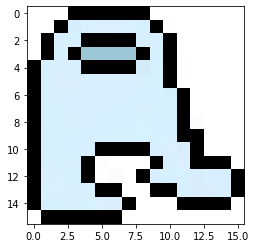

In [3]:
#
# Display image
#
image_from_file = cv2.imread('lab4-ascii.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

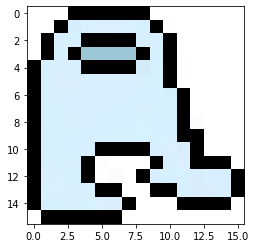

In [4]:
#
# Display image
#
image_from_file = cv2.imread('lab4-binary.ppm')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 2

In [5]:
from itertools import pairwise


rainbow_width = 256
rainbow_height = 64

keypoints = [
    [0, 0, 0],
    [0, 0, 255],
    [0, 255, 255],
    [0, 255, 0],
    [255, 255, 0],
    [255, 0, 0],
    [255, 0, 255],
    [255, 255, 255]
]

numsteps = rainbow_width // (len(keypoints) - 1)

rainbow = np.zeros(shape=(rainbow_height, rainbow_width, 3), dtype=np.uint8)

for i, (start, end) in enumerate(pairwise(keypoints)):
    transition = np.linspace(start, end, numsteps)[np.newaxis]
    rainbow[:,numsteps*i:numsteps*(i+1)] = transition
print(rainbow.shape)
print(rainbow[0,-10:])

rainbow_header = f'P6\n{rainbow_width} {rainbow_height}\n255\n'  # TODO: implement
with open('lab4-rainbow.ppm', 'wb') as fh:
    fh.write(bytearray(rainbow_header, 'ascii'))
    rainbow.tofile(fh)

(64, 256, 3)
[[255 218 255]
 [255 225 255]
 [255 233 255]
 [255 240 255]
 [255 247 255]
 [255 255 255]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]]


(64, 256, 3)


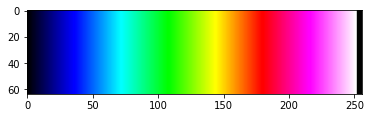

In [6]:
#
# Display image
#
image_from_file = cv2.imread('lab4-rainbow.ppm')
print(image_from_file.shape)
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Zadanie 3

In [7]:
import struct

#
# Image data
#
image = np.array(rainbow,
                    dtype=np.uint8)
print(image.shape)

def save_png(data, filename):
    #
    # Construct signature
    #
    png_file_signature = b'\x89PNG\r\n\x1a\n'

    #
    # Construct header
    #
    header_id = b'IHDR'
    header_content = struct.pack('>IIBBBBB', data.shape[1], data.shape[0], 8, 2, 0, 0, 0)
    header_size = struct.pack('>I', len(header_content))
    # network byte order (same as big-endian)
    header_crc = struct.pack('!I', zlib.crc32(header_id + header_content))
    png_file_header = header_size + header_id + header_content + header_crc

    #
    # Construct data
    #
    data_id = b'IDAT'
    data_content = zlib.compress(b''.join([b'\x00' + bytes(row) for row in data]))
    data_size = struct.pack('>I', len(data_content))
    data_crc = struct.pack('!I', zlib.crc32(data_id + data_content))
    png_file_data = data_size + data_id + data_content + data_crc

    #
    # Construct end
    #
    end_id = b'IEND'
    end_content = b''
    end_size = struct.pack('!I', len(end_content))
    end_crc = struct.pack('!I', zlib.crc32(end_id + end_content))
    png_file_end = end_size + end_id + end_content + end_crc

    #
    # Save the PNG image as a binary file
    #
    with open(filename, 'wb') as fh:
        fh.write(png_file_signature)
        fh.write(png_file_header)
        fh.write(png_file_data)
        fh.write(png_file_end)

save_png(image, 'lab4.png')

(64, 256, 3)


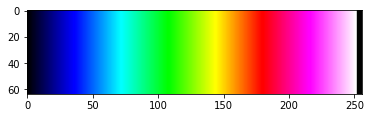

In [8]:
#
# Display image
#
image_from_file = cv2.imread('lab4.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Funkcje pomocnicze do zadań 4 i 5

In [9]:
#
# 2d Discrete Cosinus Transform
#
def dct2(array):
    return dct(dct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2(array):
    return idct(idct(array, axis=0, norm='ortho'), axis=1, norm='ortho')


#
# Calculate quantisation matrices
#
# Based on: https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/jpegUpToQuant.html
#           #step-3-and-4-discrete-cosinus-transform-and-quantisation
#
_QY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 48, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

_QC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                   [18, 21, 26, 66, 99, 99, 99, 99],
                   [24, 26, 56, 99, 99, 99, 99, 99],
                   [47, 66, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99],
                   [99, 99, 99, 99, 99, 99, 99, 99]])


def _scale(QF):
    if QF < 50 and QF >= 1:
        scale = np.floor(5000 / QF)
    elif QF < 100:
        scale = 200 - 2 * QF
    else:
        raise ValueError('Quality Factor must be in the range [1..99]')

    scale = scale / 100.0
    return scale


def QY(QF=85):
    return _QY * _scale(QF)


def QC(QF=85):
    return _QC * _scale(QF)

# Zadania 4 i 5

In [10]:
#
# 0. Image data
#
jpg_data = image

#
# 1. Convert RGB to YCbCr
#
to_cbcr_matrix = np.array([
    [ 0.229,  0.587,  0.114],
    [ 0.500, -0.418, -0.082],
    [-0.168, -0.331,  0.500],
])
jpg_data_ycbcr = np.asarray([np.array([0, 128, 128]) + to_cbcr_matrix.dot(pixel) for pixel in np.vstack(jpg_data)]) \
    .clip(min=0, max=255).reshape(image.shape).astype(np.uint8)

#
# 2. Downsampling on Cb and Cr channels
#
jpg_luma = jpg_data_ycbcr[..., 0]
jpg_chroma = jpg_data_ycbcr[..., 1:]
jpg_chroma_halved = jpg_chroma[::2, ::2]

#
# 3. Produce 8x8 blocks
#

# ensure width and height are multiples of 8 and extend if not
assert(jpg_chroma_halved.shape[0] % 8 == 0)
assert(jpg_chroma_halved.shape[1] % 8 == 0)

luma_blocks_x = np.array(np.split(jpg_luma, jpg_luma.shape[1] // 8, axis=1))
luma_blocks = np.array(np.split(luma_blocks_x, jpg_luma.shape[0] // 8, axis=1))
print('luma blocks:', luma_blocks.shape)

chroma_blocks_x = np.array(np.split(jpg_chroma_halved, jpg_chroma_halved.shape[1] // 8, axis=1))
chroma_blocks = np.array(np.split(chroma_blocks_x, jpg_chroma_halved.shape[0] // 8, axis=1))
print('chroma blocks:', chroma_blocks.shape)

#
# 4. Calculate DCT on each block
#
# TODO: implement (zad. 5)

#
# 5. Divide each block by quantisation matrix
#
# TODO: implement (zad. 5)

#
# 6. Round values in each block to integers
#
# TODO: implement (zad. 5)

#
# 7. Zig Zag
#

blocks_stacked_luma = np.vstack(luma_blocks)
blocks_stacked_cb = np.vstack(chroma_blocks[..., 0])
blocks_stacked_cr = np.vstack(chroma_blocks[..., 0])

# shamelessly copied from https://stackoverflow.com/a/50446131 because its 2AM
zigzags_luma = [np.concatenate([np.diagonal(block[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-block.shape[0], block.shape[0])]) for block in blocks_stacked_luma]
zigzags_cb = [np.concatenate([np.diagonal(block[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-block.shape[0], block.shape[0])]) for block in blocks_stacked_cb]
zigzags_cr = [np.concatenate([np.diagonal(block[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-block.shape[0], block.shape[0])]) for block in blocks_stacked_cr]

#
# 8. Flatten, concatenate, compress and calculate the size -- how many bytes?
#

zigzags = np.concatenate((zigzags_luma, zigzags_cb, zigzags_cr)).flatten()
jpg_bytes = zigzags.tobytes()

compressor = zlib.compressobj(strategy=zlib.Z_HUFFMAN_ONLY)
compressed = compressor.compress(jpg_bytes) + compressor.flush()
assert(jpg_bytes == zlib.decompress(compressed))
print('Liczba bajtow oryginalnego obrazu:', len(jpg_data.tobytes()))
print('Liczba bajtow po kompresji:', len(compressed))

#
# 7'. Undo Zig Zag
#
# We can skip it in this exercise! We did Zig Zag only for analysis in step 8.
# You can continue with result from step 6. instead of implementing undo here.
#

#
# 6'. Nothing to do here   ¯\_(ツ)_/¯
#
# No conversion is really needed here, just proceed to the next step.
#

#
# 5'. Reverse division by quantisation matrix -- multiply
#
# TODO: implement (zad. 5)

#
# 4'. Reverse DCT
#
# TODO: implement (zad. 5)

#
# 3'. Combine 8x8 blocks to original image
#

print(luma_blocks.shape)

# luma_blocks_decoded = luma_blocks.reshape((luma_blocks.shape[0] * 8, luma_blocks.shape[1] * 8))
luma_blocks_decoded = np.concatenate(luma_blocks, axis=1)
luma_blocks_decoded = np.concatenate(luma_blocks_decoded, axis=1)
assert(np.array_equal(luma_blocks_decoded, jpg_luma))

chroma_blocks_decoded = np.concatenate(chroma_blocks, axis=1)
chroma_blocks_decoded = np.concatenate(chroma_blocks_decoded, axis=1)
assert(np.array_equal(chroma_blocks_decoded, jpg_chroma[::2, ::2]))


#
# 2'. Upsampling on Cb and Cr channels
#

chroma_blocks_decoded = np.repeat(chroma_blocks_decoded, 2, axis=0)
chroma_blocks_decoded = np.repeat(chroma_blocks_decoded, 2, axis=1)

#
# 1'. Convert YCbCr to RGB
#

decoded_ycrcb = np.zeros((luma_blocks_decoded.shape[0], luma_blocks_decoded.shape[1], 3), dtype=np.uint8)
decoded_ycrcb[..., 0] = luma_blocks_decoded
decoded_ycrcb[..., 1] = chroma_blocks_decoded[...,1]
decoded_ycrcb[..., 2] = chroma_blocks_decoded[...,0]

decoded_rgb = cv2.cvtColor(decoded_ycrcb, cv2.COLOR_YCrCb2RGB)

#
# 0'. Save the decoded image -- as PPM or PNG
#
save_png(decoded_rgb, 'lab4-po-kompresji-i-dekompresji-jpeg.png')

luma blocks: (8, 32, 8, 8)
chroma blocks: (4, 16, 8, 8, 2)
Liczba bajtow oryginalnego obrazu: 49152
Liczba bajtow po kompresji: 21705
(8, 32, 8, 8)


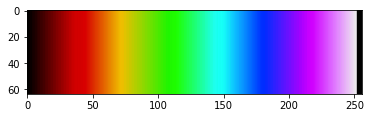

In [11]:
#
# Display image
#
image_from_file = cv2.imread('lab4-po-kompresji-i-dekompresji-jpeg.png')
pyplot.imshow(cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB))

# Obserwacje z zadań 4 i 5